In [1]:
import os
import re
from PIL import Image
import google.generativeai as genai
from dotenv import load_dotenv
from pathlib import Path
import json
import datetime as dt
from IPython.display import Markdown

In [2]:
load_dotenv()

True

In [3]:
google_api_key = os.getenv('GOOGLE_API_KEY')
genai.configure(api_key=google_api_key)

In [4]:
for m in genai.list_models():
  if 'generateContent' in m.supported_generation_methods:
    print(m.name)

models/gemini-1.0-pro-latest
models/gemini-1.0-pro
models/gemini-pro
models/gemini-1.0-pro-001
models/gemini-1.0-pro-vision-latest
models/gemini-pro-vision
models/gemini-1.5-pro-latest
models/gemini-1.5-pro-001
models/gemini-1.5-pro-002
models/gemini-1.5-pro
models/gemini-1.5-pro-exp-0801
models/gemini-1.5-pro-exp-0827
models/gemini-1.5-flash-latest
models/gemini-1.5-flash-001
models/gemini-1.5-flash-001-tuning
models/gemini-1.5-flash
models/gemini-1.5-flash-exp-0827
models/gemini-1.5-flash-002
models/gemini-1.5-flash-8b
models/gemini-1.5-flash-8b-001
models/gemini-1.5-flash-8b-latest
models/gemini-1.5-flash-8b-exp-0827
models/gemini-1.5-flash-8b-exp-0924
models/gemini-exp-1114


In [5]:
MODEL_CONFIG = {
  "temperature": 0.2,
  "top_p": 1,
  "top_k": 32,
  "max_output_tokens": 4096,
}

safety_settings = [
  {
    "category": "HARM_CATEGORY_HARASSMENT",
    "threshold": "BLOCK_MEDIUM_AND_ABOVE"
  },
  {
    "category": "HARM_CATEGORY_HATE_SPEECH",
    "threshold": "BLOCK_MEDIUM_AND_ABOVE"
  },
  {
    "category": "HARM_CATEGORY_SEXUALLY_EXPLICIT",
    "threshold": "BLOCK_MEDIUM_AND_ABOVE"
  },
  {
    "category": "HARM_CATEGORY_DANGEROUS_CONTENT",
    "threshold": "BLOCK_MEDIUM_AND_ABOVE"
  }
]

In [6]:
model = genai.GenerativeModel(model_name = "gemini-1.5-flash",
                              generation_config = MODEL_CONFIG,
                              safety_settings = safety_settings)

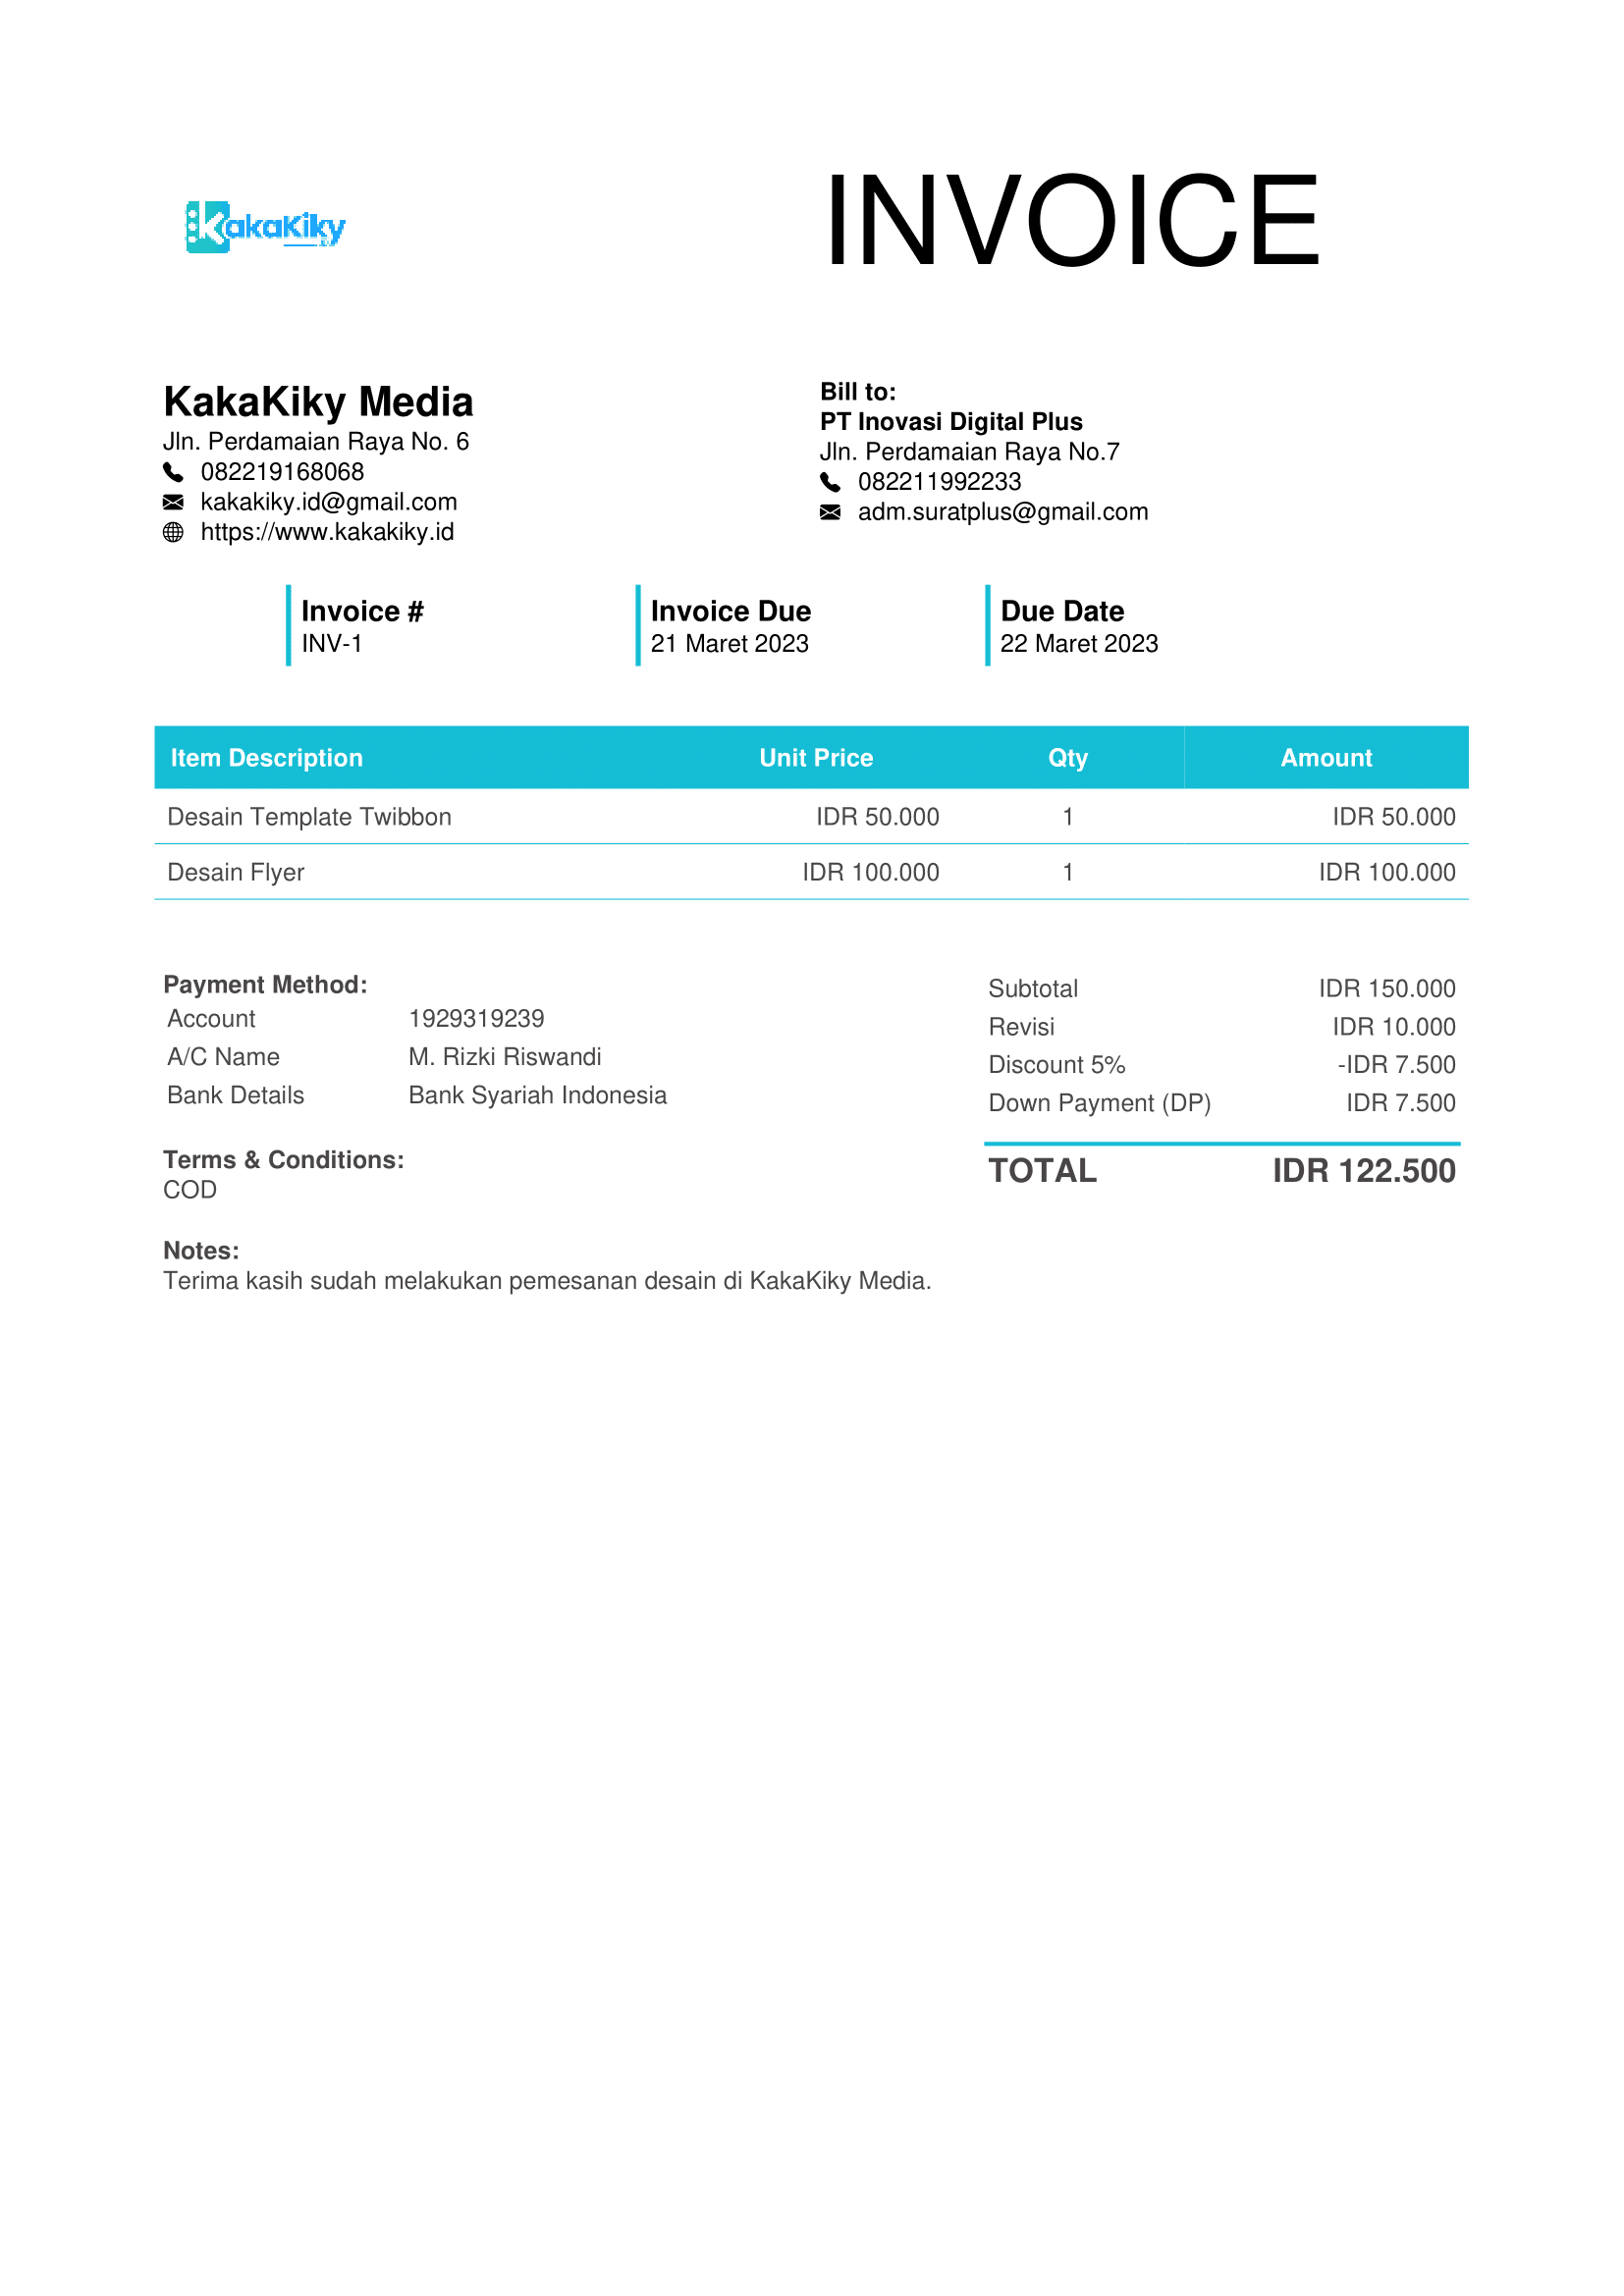

In [117]:
# Inisialisasi Image
image_path = "./data/invoice1.png"
Image.open(image_path)

In [118]:
def image_format(image_path):
    img = Path(image_path)

    if not img.exists():
        raise FileNotFoundError(f"Could not find image: {img}")

    image_parts = [
        {
            "mime_type": "image/png",
            "data": img.read_bytes()
        }
    ]
    
    return image_parts

In [119]:
def gemini_output(image_path, system_prompt, user_prompt):

    image_info = image_format(image_path)
    input_prompt= [system_prompt, image_info[0], user_prompt]
    response = model.generate_content(input_prompt)
    
    return response.text

In [120]:
prompt = """
    You are a specialist in understanding invoice documents. 
    You will be given an image of an invoice as input, 
    and your task is to answer questions based on the content of the image.

    You need to find data to fill in the data structure below,
    if there is currency data (IDR/Rp/$) do not use it,
    if there is discount data give the (%) symbol, 
    If there is a numeric value then make it an integer,
    if it does not exist then provide an empty status:
    {
        "supplier": {
            "name": ,
            "address": ,
            "phone": ,
            "email": ,
            "website": 
        },
        "invoice_number": ,
        "invoice_date": ,
        "due_date": ,
        "client": {
            "name": ,
            "address": ,
            "phone": ,
            "email": 
        },
        "items": [
            {
            "description": ,
            "unit_price": ,
            "quantity":,
            "amount":
            }
        ],
        "payment_method": {
            "account": ,
            "account_name": ,
            "bank_details": 
        },
        "totals": {
            "subtotal": ,
            "revisi": ,
            "discount": ,
            "down_payment": ,
            "total": 
        }
    }
    """

In [121]:
# genai process
invoice_to_prompt = "Convert Invoice data into json format with appropriate json tags as required for the data in image."
response = gemini_output(image_path, prompt, invoice_to_prompt)

In [122]:
print(response)

```json
{
  "supplier": {
    "name": "KakaKiky Media",
    "address": "Jln. Perdamaian Raya No. 6",
    "phone": "082219168068",
    "email": "kakakiky.id@gmail.com",
    "website": "https://www.kakakiky.id"
  },
  "invoice_number": "INV-1",
  "invoice_date": "21 Maret 2023",
  "due_date": "22 Maret 2023",
  "client": {
    "name": "PT Inovasi Digital Plus",
    "address": "Jln. Perdamaian Raya No.7",
    "phone": "082211992233",
    "email": "adm.suratplus@gmail.com"
  },
  "items": [
    {
      "description": "Desain Template Twibbon",
      "unit_price": 50000,
      "quantity": 1,
      "amount": 50000
    },
    {
      "description": "Desain Flyer",
      "unit_price": 100000,
      "quantity": 1,
      "amount": 100000
    }
  ],
  "payment_method": {
    "account": "1929319239",
    "account_name": "M. Rizki Riswandi",
    "bank_details": "Bank Syariah Indonesia"
  },
  "totals": {
    "subtotal": 150000,
    "revisi": 10000,
    "discount": "5%",
    "down_payment": 7500,
  

In [123]:
Markdown(response)

```json
{
  "supplier": {
    "name": "KakaKiky Media",
    "address": "Jln. Perdamaian Raya No. 6",
    "phone": "082219168068",
    "email": "kakakiky.id@gmail.com",
    "website": "https://www.kakakiky.id"
  },
  "invoice_number": "INV-1",
  "invoice_date": "21 Maret 2023",
  "due_date": "22 Maret 2023",
  "client": {
    "name": "PT Inovasi Digital Plus",
    "address": "Jln. Perdamaian Raya No.7",
    "phone": "082211992233",
    "email": "adm.suratplus@gmail.com"
  },
  "items": [
    {
      "description": "Desain Template Twibbon",
      "unit_price": 50000,
      "quantity": 1,
      "amount": 50000
    },
    {
      "description": "Desain Flyer",
      "unit_price": 100000,
      "quantity": 1,
      "amount": 100000
    }
  ],
  "payment_method": {
    "account": "1929319239",
    "account_name": "M. Rizki Riswandi",
    "bank_details": "Bank Syariah Indonesia"
  },
  "totals": {
    "subtotal": 150000,
    "revisi": 10000,
    "discount": "5%",
    "down_payment": 7500,
    "total": 122500
  }
}
```

In [124]:
# Extraction data
def extract_field(pattern, response):
    match = re.search(pattern, response)
    return match.group(1) if match else None

In [125]:
# Set to integer type
def int_type(value):
    try:
        return int(value) if value is not None else None
    except ValueError:
        return None

In [126]:
# Set to datetime type
def datetime_type(date_str):
    try:
        return dt.datetime.strptime(date_str, "%d/%m/%Y").strftime("%d/%m/%Y") if date_str else None
    except ValueError:
        return None

In [127]:
def mapping_data(response):
    # Invoice data structure
    invoice_data = {
        "supplier": {
            "name": None,
            "address": None,
            "phone": None,
            "email": None,
            "website": None
        },
        "invoice_number": None,
        "invoice_date": None,
        "due_date": None,
        "client": {
            "name": None,
            "address": None,
            "phone": None,
            "email": None
        },
        "items": [],
        "payment_method": {
            "account": None,
            "account_name": None,
            "bank_details": None
        },
        "totals": {
            "subtotal": None,
            "revisi": None,
            "discount": None,
            "down_payment": None,
            "total": None
        }
    }

    try:
        # Supplier Information
        supplier_section = re.search(r'"supplier":\s*{(.*?)}', response, re.DOTALL)
        if supplier_section:
            supplier_data = supplier_section.group(1)
            invoice_data["supplier"]["name"] = extract_field(r'"name":\s*"([^"]+)"', supplier_data)
            invoice_data["supplier"]["address"] = extract_field(r'"address":\s*"([^"]+)"', supplier_data)
            invoice_data["supplier"]["phone"] = extract_field(r'"phone":\s*"([^"]+)"', supplier_data)
            invoice_data["supplier"]["email"] = extract_field(r'"email":\s*"([^"]+)"', supplier_data)
            invoice_data["supplier"]["website"] = extract_field(r'"website":\s*"([^"]+)"', supplier_data)

        # Invoice Information
        invoice_data["invoice_number"] = extract_field(r'"invoice_number":\s*"([^"]+)"', response)
        invoice_data["invoice_date"] = datetime_type(extract_field(r'"invoice_date":\s*"([^"]+)"', response))
        invoice_data["due_date"] = datetime_type(extract_field(r'"due_date":\s*"([^"]+)"', response))

        # Client Information
        client_section = re.search(r'"client":\s*{(.*?)}', response, re.DOTALL)
        if client_section:
            client_data = client_section.group(1)
            invoice_data["client"]["name"] = extract_field(r'"name":\s*"([^"]+)"', client_data)
            invoice_data["client"]["address"] = extract_field(r'"address":\s*"([^"]+)"', client_data)
            invoice_data["client"]["phone"] = extract_field(r'"phone":\s*"([^"]+)"', client_data)
            invoice_data["client"]["email"] = extract_field(r'"email":\s*"([^"]+)"', client_data)

        # Payment Method
        invoice_data["payment_method"]["account"] = extract_field(r'"account":\s*"([^"]+)"', response)
        invoice_data["payment_method"]["account_name"] = extract_field(r'"account_name":\s*"([^"]+)"', response)
        invoice_data["payment_method"]["bank_details"] = extract_field(r'"bank_details":\s*"([^"]+)"', response)

        # Totals Information (Konversi ke integer untuk subtotal, revisi, down_payment, total)
        invoice_data["totals"]["subtotal"] = int_type(extract_field(r'"subtotal":\s*([0-9]+)', response))
        invoice_data["totals"]["revisi"] = int_type(extract_field(r'"revisi":\s*([0-9]+)', response))
        invoice_data["totals"]["discount"] = extract_field(r'"discount":\s*"([^"]+)"', response)
        invoice_data["totals"]["down_payment"] = int_type(extract_field(r'"down_payment":\s*([0-9]+)', response))
        invoice_data["totals"]["total"] = int_type(extract_field(r'"total":\s*([0-9]+)', response))

        # Items Information
        item_pattern = r'"description":\s*"([^"]+)",\s*"unit_price":\s*([0-9]+),\s*"quantity":\s*([0-9]+),\s*"amount":\s*([0-9]+)'
        matches = re.findall(item_pattern, response)
        
        for match in matches:
            item = {
                "description": match[0],
                "unit_price": int_type(match[1]),
                "quantity": int_type(match[2]),
                "amount": int_type(match[3])
            }
            invoice_data["items"].append(item)

    except Exception as e:
        print(f"Error during parsing: {e}")

    return invoice_data


In [148]:
# Inisialisasi JSON
json_file = mapping_data(response)
json_path = "invoice.json"

In [141]:
json_file

{'supplier': {'name': 'KakaKiky Media',
  'address': 'Jln. Perdamaian Raya No. 6',
  'phone': '082219168068',
  'email': 'kakakiky.id@gmail.com',
  'website': 'https://www.kakakiky.id'},
 'invoice_number': 'INV-1',
 'invoice_date': None,
 'due_date': None,
 'client': {'name': 'PT Inovasi Digital Plus',
  'address': 'Jln. Perdamaian Raya No.7',
  'phone': '082211992233',
  'email': 'adm.suratplus@gmail.com'},
 'items': [{'description': 'Desain Template Twibbon',
   'unit_price': 50000,
   'quantity': 1,
   'amount': 50000},
  {'description': 'Desain Flyer',
   'unit_price': 100000,
   'quantity': 1,
   'amount': 100000}],
 'payment_method': {'account': '1929319239',
  'account_name': 'M. Rizki Riswandi',
  'bank_details': 'Bank Syariah Indonesia'},
 'totals': {'subtotal': 150000,
  'revisi': 10000,
  'discount': '5%',
  'down_payment': 7500,
  'total': 122500}}

In [144]:
# Clean phone data values
def clean_phone(phone):
    if isinstance(phone, int):
        return phone

    cleaned_phone = re.sub(r'[^\d]', '', phone)
    
    if cleaned_phone.startswith("0"):
        cleaned_phone = "62" + cleaned_phone[1:]

    return int(cleaned_phone)

json_file["supplier"]["phone"] = clean_phone(json_file["supplier"]["phone"])
json_file["client"]["phone"] = clean_phone(json_file["client"]["phone"])

In [145]:
json_file

{'supplier': {'name': 'KakaKiky Media',
  'address': 'Jln. Perdamaian Raya No. 6',
  'phone': 6282219168068,
  'email': 'kakakiky.id@gmail.com',
  'website': 'https://www.kakakiky.id'},
 'invoice_number': 'INV-1',
 'invoice_date': None,
 'due_date': None,
 'client': {'name': 'PT Inovasi Digital Plus',
  'address': 'Jln. Perdamaian Raya No.7',
  'phone': 6282211992233,
  'email': 'adm.suratplus@gmail.com'},
 'items': [{'description': 'Desain Template Twibbon',
   'unit_price': 50000,
   'quantity': 1,
   'amount': 50000},
  {'description': 'Desain Flyer',
   'unit_price': 100000,
   'quantity': 1,
   'amount': 100000}],
 'payment_method': {'account': '1929319239',
  'account_name': 'M. Rizki Riswandi',
  'bank_details': 'Bank Syariah Indonesia'},
 'totals': {'subtotal': 150000,
  'revisi': 10000,
  'discount': '5%',
  'down_payment': 7500,
  'total': 122500}}

In [147]:
# Simpan data dalam format JSON
try:
    with open(json_path, "w") as outfile:
        json.dump(json_file, outfile, indent=4)
    print(f"Data invoice berhasil disimpan ke {json_path}")
except Exception as e:
    print(f"Terjadi kesalahan: {e}")

Data invoice berhasil disimpan ke invoice.json
